## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice = len(combined_data["Mouse ID"])
number_of_mice

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data = combined_data.loc[combined_data["Mouse ID"]=="g898", ["Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint",
                                   "Tumor Volume (mm3)", "Metastatic Sites"]]

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data = combined_data[combined_data['Mouse ID'].isin(duplicates)==False]

In [7]:
# Checking the number of mice in the clean DataFrame.
print(len(combined_data["Mouse ID"]))

1880


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [46]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
indexed_combined_data = combined_data.set_index("Drug Regimen")
grouped_regimen = indexed_combined_data.groupby("Drug Regimen")

# Calculate the values for the dataframe
grouped_regimen_mean = (grouped_regimen).mean()["Tumor Volume (mm3)"]
grouped_regimen_median = (grouped_regimen).median()["Tumor Volume (mm3)"]
grouped_regimen_var = grouped_regimen["Tumor Volume (mm3)"].var()
grouped_regimen_std = grouped_regimen["Tumor Volume (mm3)"].std()
grouped_regimen_sem = grouped_regimen["Tumor Volume (mm3)"].sem()

# Create dataframe
summary_stats = pd.DataFrame({"Mean Volume": grouped_regimen_mean,
                                  "Median Volume": grouped_regimen_median,
                                  "Variance": grouped_regimen_var,
                                  "Standard Deviation": grouped_regimen_std,
                                  "SEM": grouped_regimen_sem})
summary_stats

,Mean Volume,Median Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = grouped_regimen["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

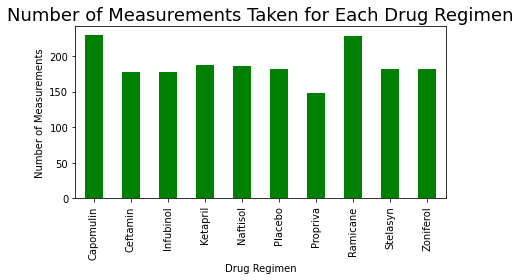

In [48]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# count number of measurements for each regimen
measurement_total = grouped_regimen["Tumor Volume (mm3)"].count()

# Plot the data
pandas_barplot = measurement_total.plot(kind="bar", color="green")
plt.title("Number of Measurements Taken for Each Drug Regimen", fontsize=18)
plt.ylabel("Number of Measurements")
plt.tight_layout()
plt.show()

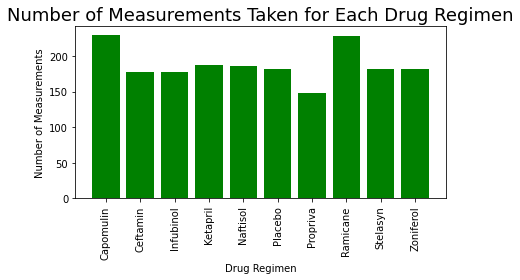

In [49]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Create drug regimen labels
drug_regimens = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 
                'Stelasyn', 'Zoniferol']

# Generate x and y values
x_axis = np.arange(0, len(drug_regimens))
mice_count = grouped_regimen["Tumor Volume (mm3)"].count().tolist()

# Plot the data
plt.bar(x_axis, mice_count, color="green", align="center")

tick_locations = []
for x in x_axis:
    tick_locations.append(x)

# Add labels and show the plot
plt.title("Number of Measurements Taken for Each Drug Regimen", fontsize=18)
plt.xticks(tick_locations, drug_regimens, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.tight_layout()
plt.show()

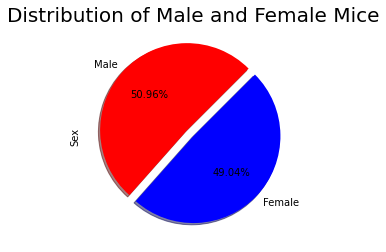

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Get counts for male and female rats
grouped_gender = combined_data["Sex"].value_counts()
grouped_gender

# Plot the pie chart
colors = ["red", "blue"]
explode = (0.1, 0)
pie_pandas = grouped_gender.plot(kind="pie", colors=colors, shadow=True, startangle=45, explode=explode, autopct="%.2f%%")
plt.title("Distribution of Male and Female Mice", fontsize=20)
plt.show()

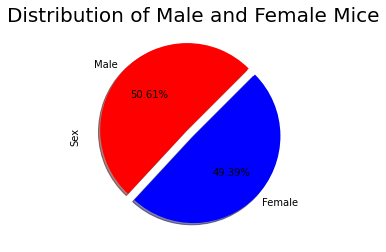

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# create labels and plot features
labels = ["Male", "Female"]
sizes = [50.61, 49.39]
colors = ["red", "blue"]
explode = (0.1, 0)

# Plot the data
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%.2f%%", shadow=True, startangle=45)
plt.title("Distribution of Male and Female Mice", fontsize=20)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get the last timepoint for each mouse accross the four treatments and create a new data frame for each 
cap = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
cap_lasttime = cap.groupby("Mouse ID")["Timepoint"].max()
cap_lasttime_df = pd.DataFrame(cap_lasttime)

ram = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]
ram_lasttime = ram.groupby("Mouse ID")["Timepoint"].max()
ram_lasttime_df = pd.DataFrame(ram_lasttime)

inf = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]
inf_lasttime = inf.groupby("Mouse ID")["Timepoint"].max()
inf_lasttime_df = pd.DataFrame(inf_lasttime)

ceft = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]
ceft_lasttime = ceft.groupby("Mouse ID")["Timepoint"].max()
ceft_lasttime_df = pd.DataFrame(ceft_lasttime)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_merged = pd.merge(cap_lasttime_df, combined_data, on=("Mouse ID","Timepoint"),how="left")

In [54]:
# Merge and calculate the IQR and quantitatively determine if there are any potential outliers for Capomulin. 
cap_tumor = cap_merged["Tumor Volume (mm3)"]

quartiles = cap_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin Final Tumor values below {lower_bound} could be outliers.")
print(f"Capomulin Final Tumor values above {upper_bound} could be outliers.")

Capomulin Final Tumor values below 20.70456164999999 could be outliers.
Capomulin Final Tumor values above 51.83201549 could be outliers.


In [55]:
# Merge and calculate the IQR and quantitatively determine if there are any potential outliers for Ramicane. 
ram_merged = pd.merge(ram_lasttime_df, combined_data, on=("Mouse ID","Timepoint"),how="left")
ram_tumor = ram_merged["Tumor Volume (mm3)"]

quartiles = ram_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane Final Tumor values below {lower_bound} could be outliers.")
print(f"Ramicane Final Tumor values above {upper_bound} could be outliers.")

Ramicane Final Tumor values below 17.912664470000003 could be outliers.
Ramicane Final Tumor values above 54.30681135 could be outliers.


In [56]:
# Merge and calculate the IQR and quantitatively determine if there are any potential outliers for Infubinol. 
inf_merged = pd.merge(inf_lasttime_df, combined_data, on=("Mouse ID","Timepoint"),how="left")
inf_tumor = inf_merged["Tumor Volume (mm3)"]

quartiles = inf_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol Final Tumor values below {lower_bound} could be outliers.")
print(f"Infubinol Final Tumor values above {upper_bound} could be outliers.")

Infubinol Final Tumor values below 36.83290494999999 could be outliers.
Infubinol Final Tumor values above 82.74144559000001 could be outliers.


In [57]:
# Merge and calculate the IQR and quantitatively determine if there are any potential outliers for Ceftamin. 
ceft_merged = pd.merge(ceft_lasttime_df, combined_data, on=("Mouse ID","Timepoint"),how="left")
ceft_tumor = ceft_merged["Tumor Volume (mm3)"]

quartiles = ceft_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin Final Tumor values below {lower_bound} could be outliers.")
print(f"Ceftamin Final Tumor values above {upper_bound} could be outliers.")

Ceftamin Final Tumor values below 25.355449580000002 could be outliers.
Ceftamin Final Tumor values above 87.66645829999999 could be outliers.


In [38]:
# # Put treatments into a list for for loop (and later for plot labels)
# treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# # Create empty list to fill with tumor vol data (for plotting)

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
# quartiles = last_timepoints["Tumor Volume (mm3)"].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
    
#     # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
#     # add subset 
    
    
#     # Determine outliers using upper and lower bounds
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff61bca2610>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff61bca2d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff61bca22b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff61b7f31c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff61b7f35e0>,
 'means': []}

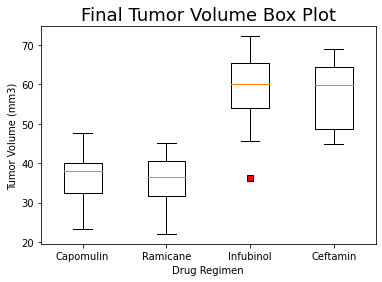

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data = [cap_tumor, ram_tumor, inf_tumor, ceft_tumor]
red_square = dict(markerfacecolor='r', marker='s')

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume Box Plot", fontsize=18)
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_data, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops=red_square)

## Line and Scatter Plots

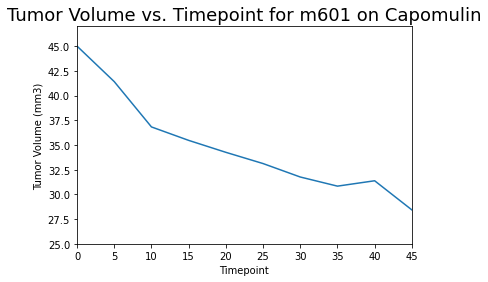

In [61]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Locate m601
m601_data = cap.loc[cap["Mouse ID"]=="m601"]

# Get data for m601
x_axis = m601_data["Timepoint"]
tum_vol = m601_data["Tumor Volume (mm3)"]

# Show the line plot
plt.plot(x_axis, tum_vol)
plt.title("Tumor Volume vs. Timepoint for m601 on Capomulin", fontsize=18)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,45)
plt.ylim(25, 47)
plt.show()

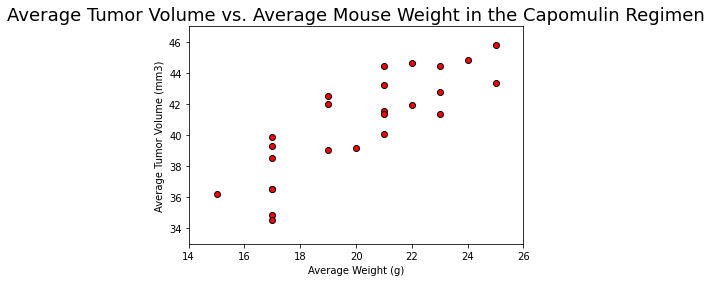

In [62]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Get average tumor volume and mouse weight
avg_vol = cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_weight = cap.groupby("Mouse ID")["Weight (g)"].mean()

# show the scatter plot
plt.scatter(avg_weight, avg_vol, marker="o", facecolors='red', edgecolors="black")
plt.title("Average Tumor Volume vs. Average Mouse Weight in the Capomulin Regimen", fontsize = 18)
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylim(33, 47)
plt.xlim(14, 26)
plt.show()

## Correlation and Regression

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = sts.pearsonr(avg_weight, avg_vol)
print(f'The correlation coefficient between mouse weight and average tumor volums is {round(correlation[0],2)}')

The correlation coefficient between mouse weight and average tumor volums is 0.84


The r-squared is: 0.7088568047708717


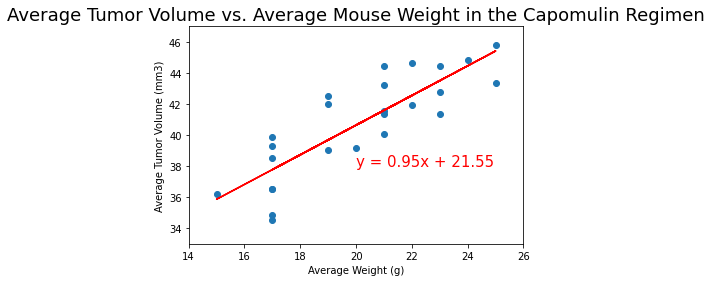

In [65]:
# Import linregress
from scipy.stats import linregress

# Create x and y values
x_values = avg_weight
y_values = avg_vol

# Calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Show the scatter plot with the linear equation and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Average Mouse Weight in the Capomulin Regimen", fontsize = 18)
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylim(33, 47)
plt.xlim(14, 26)
print(f"The r-squared is: {rvalue**2}")
plt.show()